In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
features = data.filter(regex=r"_mean", axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [24]:
y = data['diagnosis'].map({'M':0, 'B': 1})

In [25]:
y.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

In [27]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((284, 10), (285, 10), (284,), (285,))

In [28]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [29]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       113
           1       0.96      0.94      0.95       172

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [30]:
import shap
shap.initjs()

In [31]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

In [32]:
shap_values[0].shape

(284, 10)

In [33]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

In [34]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:])

In [35]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

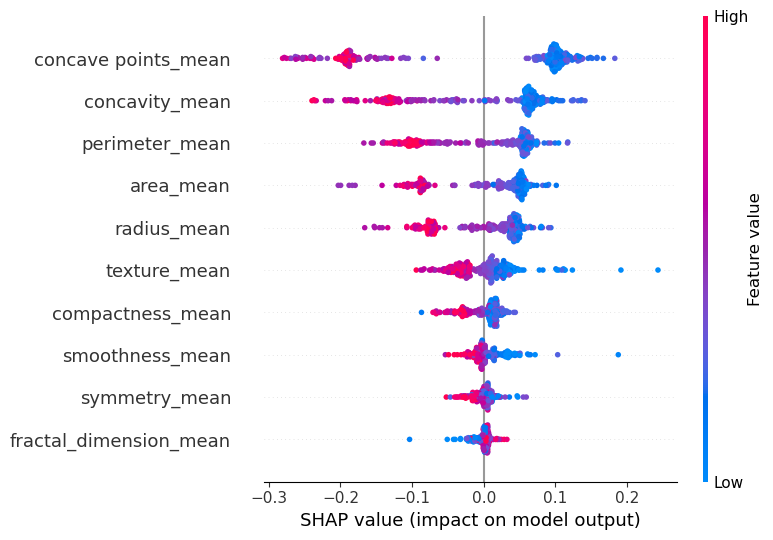

In [36]:
shap.summary_plot(shap_values[1], Xtrain)

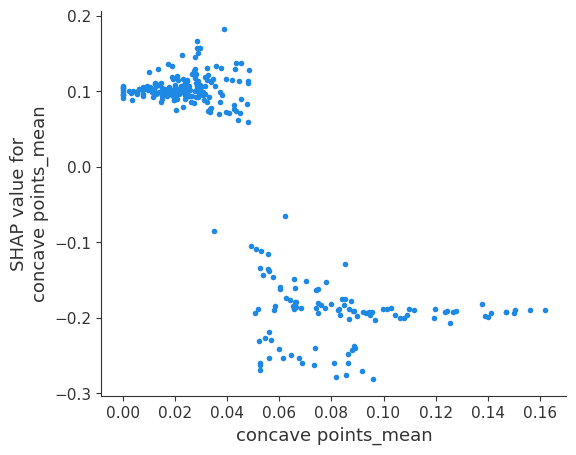

In [37]:
shap.dependence_plot("concave points_mean", shap_values[1], Xtrain, interaction_index=None)